# Live events and the effect on foot traffic 
__Authored by:__ Keefe Alpay and Nathan Clee <br>

__Duration:__ 90 mins <br>
__Level:__ Intermediate <br>
__Pre-requisite Skills:__ Python <br>
*** 
### Scenario 
* As a business owner in the city of Melbourne, I wish to know where the pedestrian traffic are during live events. <br>
* As the city council, we want to determine the impact of live events on pedestrian traffic and if possible, the forecast for future live events. <br>

### Exploratory Data Analysis Objectives 
Live events are defined as events experienced in real-time, where an audience is present and engaged with a performance or an activity. Live events can include concerts, sporting events such as the Tennis or the AFL, Clubs with music and comedy  clubs.

The goals for this analysis are:
* Analyse foot traffic near locations where live events would occur (Marvel stadium, near flinders st station towards MCG)
* Identify the volume of pedestrian traffic during live events 
* Project/predict the forecast for live events in a graph 

### Strategic Benefits for the City of Melbourne
Analysing pedestrian foot traffic during live events can help Melbourne residents, business owners and the council in the following ways:
* Businesses that undestand foot traffic can help them optimise their operations and better their marketing efforts. For example, when foot traffic is heavy during certain nights, businesses can extend their trading hours, allowing more customers to shop. Businesses can also advertise their product or service in specific locations where foot traffic is heavy. 
* Foot traffic can benefit the city council by helping them understand how the pedestrians use footpaths. The council can allocate resources to improve pedestrian experience by improving lighting in certain areas and investing in public transport to make buses and trams easily accessible during live events.

***
## City Of Melbourne Open Data Datasets
### Pedestrian Counting System - Monthly (counts per hour)
The first and most improtant dataset we are going to explore is the pedestrian foot traffic
*__[Pedestrian Counting System - Monthly (counts per hour)](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/)__*

### Pedestrian Counting System - Past Hour (counts per minute)
The second dataset is *__[Pedestrian Counting System - Past Hour (counts per minute)](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/)__*

### Pedestrian Counting System - Sensor Locations
The third dataset is *__[Pedestrian Counting System - Sensor Locations](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-past-hour-counts-per-minute/information/)__*

##  First, we need to check which of the foot traffic sensors work 

In [71]:
import requests

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-past-hour-counts-per-minute&q=&rows=1000&sort=sensingdatetime&facet=locationid&facet=sensingdatetime')

data = response.json()

ID = []

for record in data['records']:
    ID.append(record['fields']['locationid'])

ID = sorted(set(ID))

print(ID)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 23, 24, 26, 27, 28, 29, 30, 31, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 72, 75, 76, 77, 79, 84, 85, 86, 87, 107, 109, 117, 118, 122]


## Next, I need to find the closest working foot traffic sensor to the MCG 

In [72]:
import math
import requests

table1 = []
 
a = -37.81986511309929, 144.9834707379584

table1.append(a)

response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2&facet=Location')

data = response.json()

table2 = []

for item in data['records']:
    table2.append(item['fields']['location'])

def distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c  
    return d
total_directions = []

distances = []
for coord1 in table1:
    for coord2 in table2:
        d = distance(coord1, coord2)
        distances.append((d, coord1, coord2))

distances.sort()

for i in range(7):
    print(f"Closest match {i+1}: Distance {distances[i][0]:.2f}km, Coordinates {distances[i][1]}, {distances[i][2]}")
    
response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2')

data = response.json()

for i in range(7):
    for record in data['records']:
        sensing_datetime = record['fields']['location']
        total_directions = record['fields']['location_id']
        if distances[i][2] == sensing_datetime:
            print(f"Match{i+1}: {total_directions}")

Closest match 1: Distance 0.60km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81498411, 144.98638807]
Closest match 2: Distance 0.66km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81499687, 144.97925064]
Closest match 3: Distance 0.66km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81493732, 144.97932442]
Closest match 4: Distance 0.67km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81488315, 144.97926569]
Closest match 5: Distance 0.68km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.82102867, 144.97590204]
Closest match 6: Distance 0.78km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81303095, 144.98124662]
Closest match 7: Distance 0.93km, Coordinates (-37.81986511309929, 144.9834707379584), [-37.81515276, 144.97467661]
Match1: 93
Match2: 96
Match3: 116
Match4: 95
Match5: 110
Match6: 94
Match7: 75


## The closest working  foot traffic sensor is 75 and I need to look at its location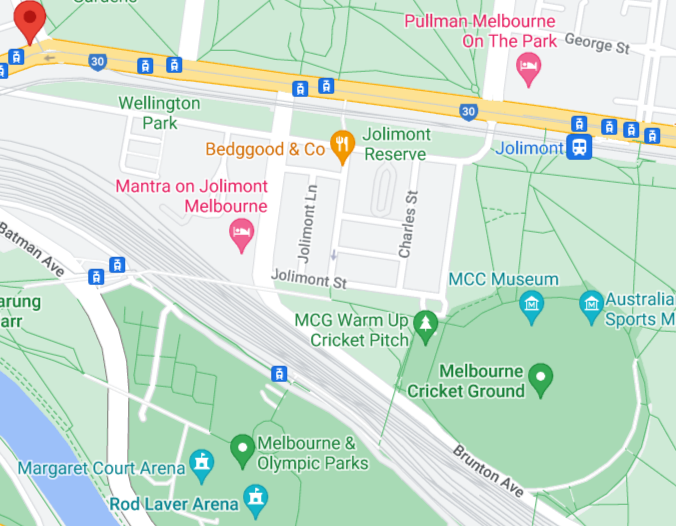  this location seems close enough to track the foot traffic increase. It will track the amount of people leaving flinders station and heading to the MCG 

## Next, I need to create a CSV file with the date so I can recreate the Graph

In [73]:
import csv
import requests

location_id = '75'

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-past-hour-counts-per-minute&q=&rows=9999&sort=sensingdatetime&facet=locationid&facet=sensingdatetime&refine.locationid={location_id}')

data = response.json()

data_list = []

for record in data['records']:
    sensing_date = record['fields']['sensingdate']
    sensing_time = record['fields']['sensingtime']
    total_directions = str(record['fields']['total_of_directions'])
    data = sensing_date + ',' + sensing_time + ',' + total_directions
    data_list.append([sensing_date, sensing_time, total_directions])

with open('senor_75.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Time', 'Total'])
    writer.writerows(data_list)

## Now I need to start graphing first I am going to graph the total foot traffic each day (I have modified the code so it always shows the days I was analysing)

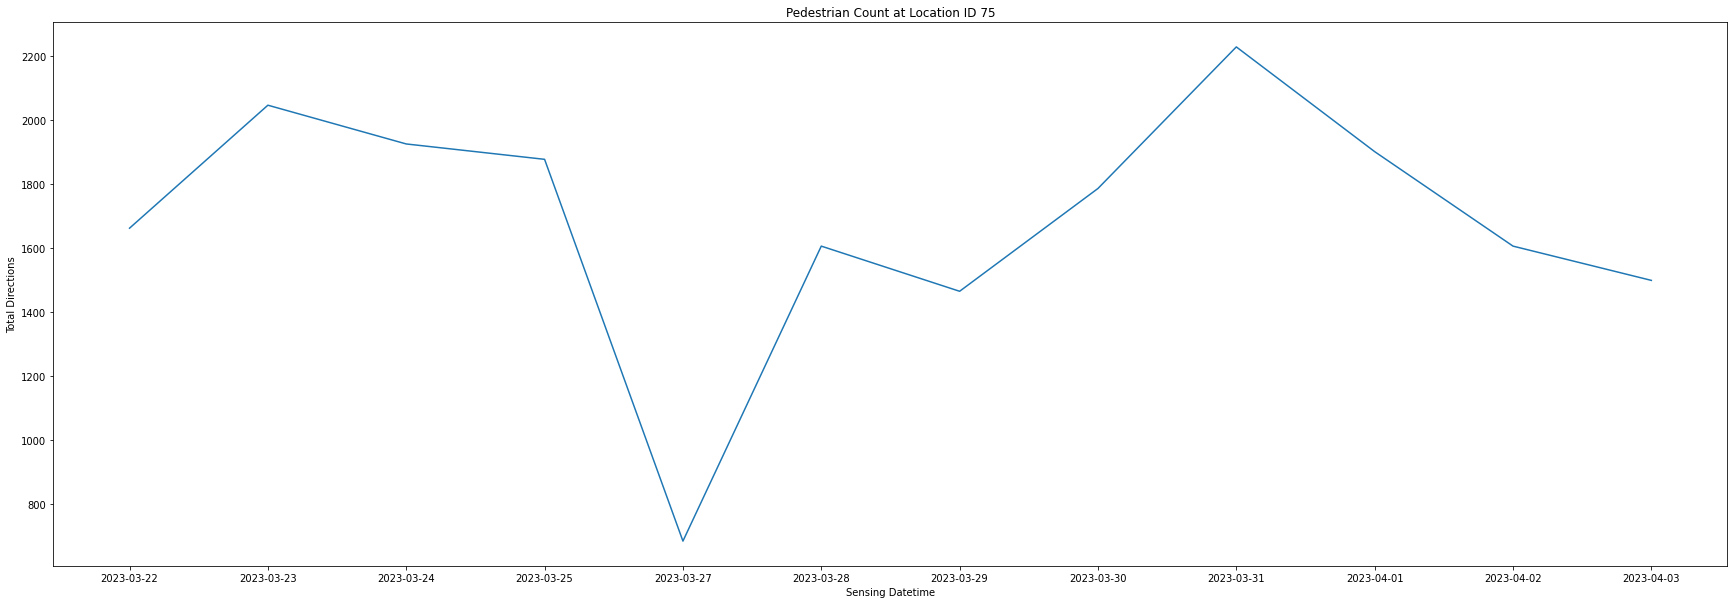

In [1]:
import requests
import matplotlib.pyplot as plt

sensingdates = ['2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-27',
                '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02',
                '2023-04-03']

responses = []
data1 = []

for sensingdate in sensingdates:
    response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-past-hour-counts-per-minute&q=&rows=9993&sort=sensingdatetime&facet=sensingdate&facet=locationid&refine.sensingdate={sensingdate}&refine.locationid=75')
    responses.append(response)
    data = response.json()
    data1.append(data)
    

total_directions_list = []
day_total = 0
i = 0
while i < 12:
    for record in data1[i]['records']:
        total_directions = record['fields']['total_of_directions']
        day_total += total_directions
    i += 1
    total_directions_list.append(day_total)
    day_total = 0
    

fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensingdates, total_directions_list)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 75')
plt.show()



## This graph shows that there are spikes on 23/03/23 and  31/3/23 these directly relate to AFL games where both teams are from or near Melbourne  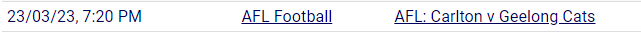  


## 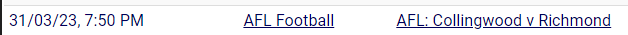This shows that the foot traffic was increased by these live events. 

## Next, I am going to look at just 31/03/23 since it is the largest spike

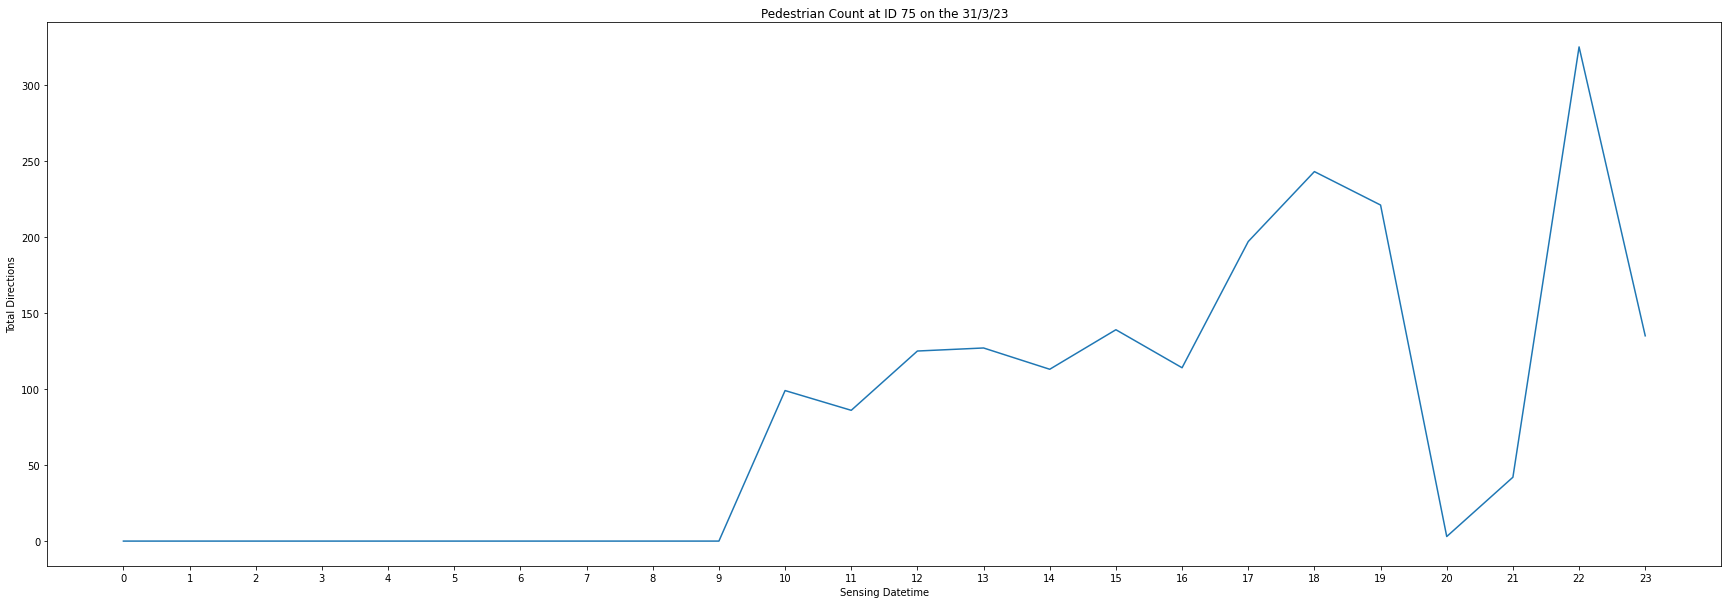

In [75]:
import requests
import matplotlib.pyplot as plt

sensingdate = '2023-03-31'

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-past-hour-counts-per-minute&q=&rows=9993&sort=sensingdatetime&facet=sensingdate&facet=locationid&refine.sensingdate={sensingdate}&refine.locationid=75')

data = response.json()

sensing_datetime_list = ["0", "1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
total_directions_list = []
prevois_date_lsit = ('2023-03-31')
total_hour_0 = 0
total_hour_1 = 0
total_hour_2 = 0
total_hour_3 = 0
total_hour_4 = 0
total_hour_5 = 0
total_hour_6 = 0
total_hour_7 = 0
total_hour_8 = 0
total_hour_9 = 0
total_hour_10 = 0
total_hour_11 = 0
total_hour_12 = 0
total_hour_13 = 0
total_hour_14 = 0
total_hour_15 = 0
total_hour_16 = 0
total_hour_17 = 0
total_hour_18 = 0
total_hour_19 = 0
total_hour_20 = 0
total_hour_21 = 0
total_hour_22 = 0
total_hour_23 = 0

for record in data['records']:
    sensing_date = record['fields']['sensingdate']
    total_directions = record['fields']['total_of_directions']
    if prevois_date_lsit == sensing_date:
        sensing_datetime = record['fields']['sensingtime']
        substrings = sensing_datetime.split(":")
        if substrings[0] == ("0"):
            total_hour_0 += total_directions
        elif substrings[0] == ("1"):
            total_hour_1 += total_directions
        elif substrings[0] == ("2"):
            total_hour_2 += total_directions
        elif substrings[0] == ("3"):
            total_hour_3 += total_directions
        elif substrings[0] == ("4"):
            total_hour_4 += total_directions
        elif substrings[0] == ("5"):
            total_hour_5 += total_directions
        elif substrings[0] == ("6"):
            total_hour_6 += total_directions
        elif substrings[0] == ("7"):
            total_hour_7 += total_directions
        elif substrings[0] == ("8"):
            total_hour_8 += total_directions
        elif substrings[0] == ("9"):
            total_hour_9 += total_directions
        elif substrings[0] == ("10"):
            total_hour_10 += total_directions
        elif substrings[0] == ("11"):
            total_hour_11 += total_directions
        elif substrings[0] == ("12"):
            total_hour_12 += total_directions
        elif substrings[0] == ("13"):
            total_hour_13 += total_directions
        elif substrings[0] == ("14"):
            total_hour_14 += total_directions
        elif substrings[0] == ("15"):
            total_hour_15 += total_directions
        elif substrings[0] == ("16"):
            total_hour_16 += total_directions
        elif substrings[0] == ("17"):
            total_hour_17 += total_directions
        elif substrings[0] == ("18"):
            total_hour_18 += total_directions
        elif substrings[0] == ("19"):
            total_hour_19 += total_directions
        elif substrings[0] == ("20"):
            total_hour_20 += total_directions
        elif substrings[0] == ("21"):
            total_hour_21 += total_directions
        elif substrings[0] == ("22"):
            total_hour_22 += total_directions
        elif substrings[0] == ("23"):
            total_hour_23 += total_directions

total_directions_list.append(total_hour_0)
total_directions_list.append(total_hour_1)
total_directions_list.append(total_hour_2)
total_directions_list.append(total_hour_3)
total_directions_list.append(total_hour_4)
total_directions_list.append(total_hour_5)
total_directions_list.append(total_hour_6)
total_directions_list.append(total_hour_7)
total_directions_list.append(total_hour_8)
total_directions_list.append(total_hour_9)
total_directions_list.append(total_hour_10)
total_directions_list.append(total_hour_11)
total_directions_list.append(total_hour_12)
total_directions_list.append(total_hour_13)
total_directions_list.append(total_hour_14)
total_directions_list.append(total_hour_15)
total_directions_list.append(total_hour_16)
total_directions_list.append(total_hour_17)
total_directions_list.append(total_hour_18)
total_directions_list.append(total_hour_19)
total_directions_list.append(total_hour_20)
total_directions_list.append(total_hour_21)
total_directions_list.append(total_hour_22)
total_directions_list.append(total_hour_23)

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(sensing_datetime_list, total_directions_list)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at ID 75 on the 31/3/23')
plt.show()

## This graph shows that the peaks for the day were around 5, 6 and 7 pm and 10 pm this is because those are the times when people were heading to the footy game that started at 7:50 pm and leaving the footy game. Also, the lowest moment during the day besides the morning was around 8 and 9 this is most likey due the the game being on at that time.


## This shows that the footy (Live event) made the foot traffic in the area go up which means the local business near by would have had more foot traffic which means more business.

## It would be beneficial for businesses nearby to stay open later on footy game nights as it increases the amount of foot traffic later on in the night to even 10 pm. Businesses could also advertise near these roads during this increased traffic period. As well as portable businesses like food trucks could be set up nearby. If businesses did this just when both teams are from Melbourne as this increases the foot traffic as well it would increase their sales.   



## Now, I am going to be looking at marvel stadium to see if it increases foot traffic


## First, let's find the closest working foot traffic senors     

In [8]:
import math
import requests

table1 = []
 
a = -37.8166, 144.9475

table1.append(a)

response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2&facet=Location')

data = response.json()

table2 = []

for item in data['records']:
    table2.append(item['fields']['location'])

def distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c  
    return d
total_directions = []

distances = []
for coord1 in table1:
    for coord2 in table2:
        d = distance(coord1, coord2)
        distances.append((d, coord1, coord2))

distances.sort()

for i in range(2):
    print(f"Closest match {i+1}: Distance {distances[i][0]:.2f}km, Coordinates {distances[i][1]}, {distances[i][2]}")
    
response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2')

data = response.json()

for i in range(2):
    for record in data['records']:
        sensing_datetime = record['fields']['location']
        total_directions = record['fields']['location_id']
        if distances[i][2] == sensing_datetime:
            print(f"Match{i+1}: {total_directions}")

Closest match 1: Distance 0.24km, Coordinates (-37.8166, 144.9475), [-37.81876474, 144.94710545]
Closest match 2: Distance 0.27km, Coordinates (-37.8166, 144.9475), [-37.8176735, 144.95025594]
Match1: 10
Match2: 57


## The cloests foot traffic sensor

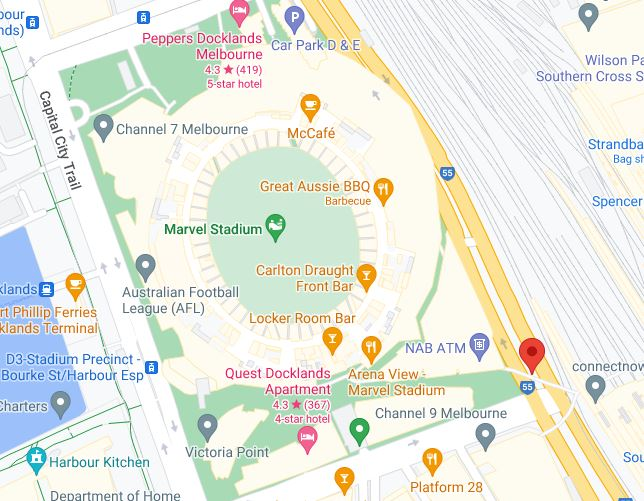

## This will show the traffic going into into the stadium

## Now lets use the whole dataset and graph how much traffic there is

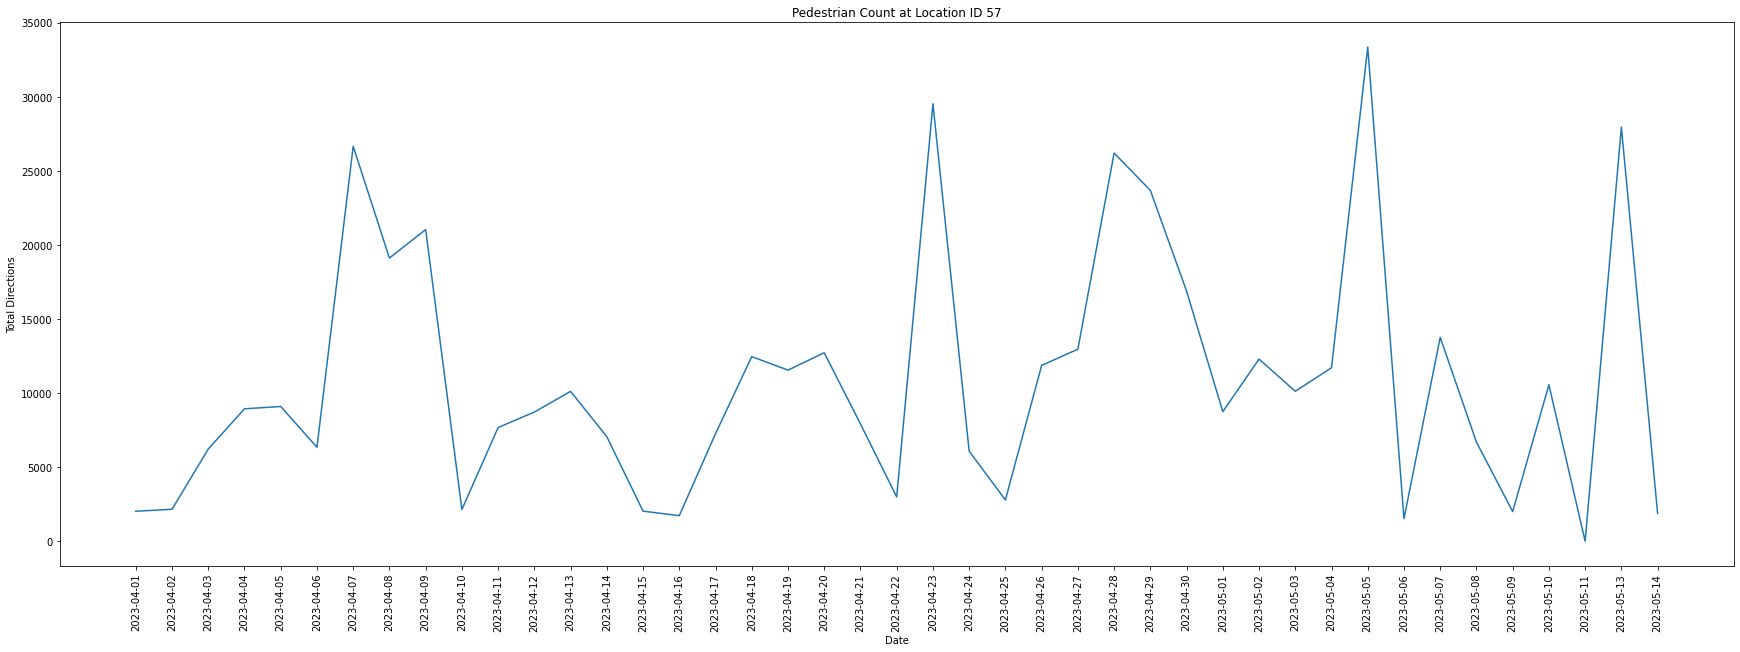

In [2]:
import requests
import matplotlib.pyplot as plt

location_id = '57'

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=9999&sort=timestamp&facet=timestamp&facet=locationid&refine.locationid={location_id}&timezone=Australia%2Fsydney')

data = response.json()

sensing_datetime_list = []
total_directions_list = []
previous_date = None
day_total = 0

for record in data['records']:
    sensing_datetime = record['fields']['timestamp']
    sensing_date = sensing_datetime.split('T')[0]  # Extract the date part only
    total_directions = record['fields']['total_of_directions']

    if previous_date == sensing_date:
        day_total += total_directions
    else:
        if previous_date:
            total_directions_list.append(day_total)
            sensing_datetime_list.append(previous_date)
        day_total = total_directions
    previous_date = sensing_date

if previous_date:
    total_directions_list.append(day_total)
    sensing_datetime_list.append(previous_date)

sensing_datetime_list.reverse()
total_directions_list.reverse()

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(sensing_datetime_list, total_directions_list)
ax.set_xlabel('Date')
ax.set_ylabel('Total Directions')
ax.set_title(f'Pedestrian Count at Location ID {location_id}')
plt.xticks(rotation=90)
plt.show()

## As you can see there is a two major spikes on 2023/05/05 and on the 2023/05/13

## This is because of two footy matches on these dates.

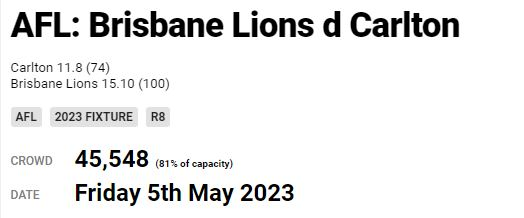




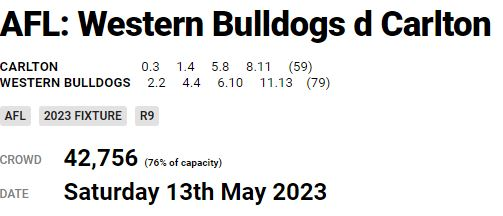

## Now let's graph the highest spike to check it is the footy match at the Marvel stadium making the spike. 2032/05/05

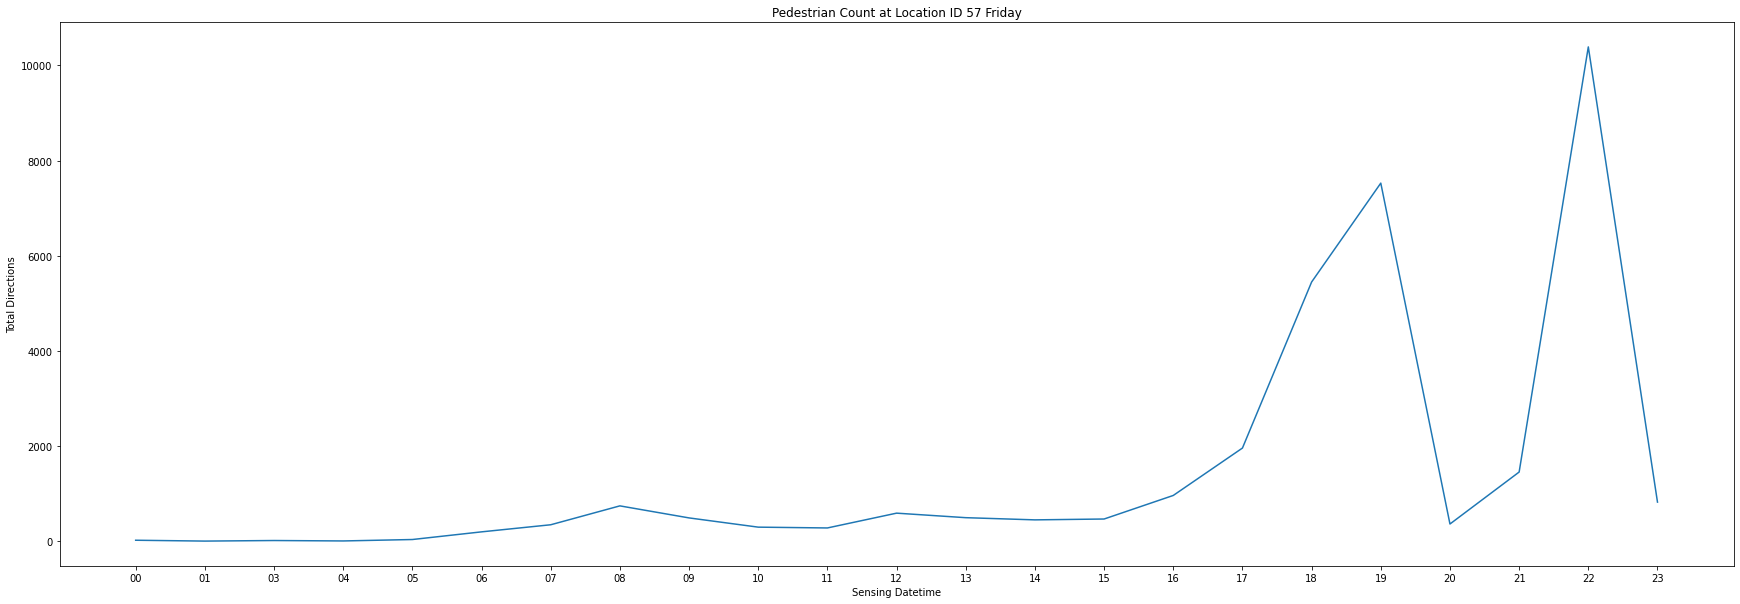

In [27]:
import requests
import matplotlib.pyplot as plt

sensing_datetime1 = []
total_directions1 = []

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=9999&sort=-timestamp&facet=timestamp&facet=locationid&refine.timestamp=2023-05-05&refine.locationid=57&timezone=Australia%2Fsydney')
data = response.json()

for record in data['records']:
    sensing_datetime = record['fields']['timestamp']
    sensing_datetime1.append(sensing_datetime[11:13])
    total_directions = record['fields']['total_of_directions']
    total_directions1.append(total_directions)

fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensing_datetime1, total_directions1)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 57 Friday')
plt.show()

## The graph illustrates that the highest peaks of foot traffic occurred around 6 and 7 pm, as well as 10 pm. These peaks can be attributed to people heading to the football game, which commenced at 7:50 pm, and those leaving the game. Additionally, apart from the morning hours, the lowest point during the day was observed around 8 and 9 pm, likely due to the game taking place at that time.

## The data indicates that the football event significantly influenced the foot traffic in the area, thereby potentially benefiting local businesses. The increased foot traffic suggests that businesses in proximity to the event location would have experienced higher customer activity, resulting in increased business opportunities.

## Considering these findings, it would be advantageous for nearby businesses to extend their operating hours on football game nights, potentially until 10 pm, as the foot traffic it highest here at 10000 people. Moreover, businesses could consider advertising their products or services along the roads experiencing this heightened traffic. Additionally, the presence of portable businesses, such as food trucks, in the vicinity could cater to the increased demand. To maximize the impact, businesses could focus on these strategies specifically when both teams participating in the game are from Melbourne, as this tends to generate even greater foot traffic and subsequently boost sales.  

##  First, we need to check which of the foot traffic sensors work again to compare to the next results

In [3]:
import requests

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=1000&sort=timestamp')

data = response.json()

ID = []

for record in data['records']:
    ID.append(int(record['fields']['locationid']))

ID = sorted(set(ID))

print(ID)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 84, 85, 86, 87, 107, 108, 109, 117, 118, 122]


## Now I am going to find the closet working foot traffic sensors to any music venues 

In [26]:
import math
import requests

response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=live-music-venues&q=&rows=300&facet=venue_name&facet=space_type')
data = response.json()

table1 = []
venue_names = []

for item in data['records']:
    table1.append(item['fields']['geolocation'])
    venue_names.append(item['fields']['venue_name'])

response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2&facet=Location')
data = response.json()

table2 = []

for item in data['records']:
    table2.append(item['fields']['location'])

def distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d

distances = []
for coord1 in table1:
    for coord2 in table2:
        d = distance(coord1, coord2)
        distances.append((d, coord1, coord2))

distances.sort()

for i in range(10):
    distance_km, venue_coord, sensor_coord = distances[i]
    print(f"Closest match {i+1}: Distance {distances[i][0]:.2f}km, Coordinates {distances[i][1]}, {distances[i][2]}")

response = requests.get('https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-sensor-locations&q=&rows=200&facet=installation_date&facet=status&facet=direction_1&facet=direction_2')
data = response.json()

for i in range(10):
    for record in data['records']:
        sensing_datetime = record['fields']['location']
        total_directions = record['fields']['location_id']
        if distances[i][2] == sensing_datetime:
            venue_name = venue_names[table1.index(distances[i][1])]
            print(f"Match {i+1}: Venue '{venue_name}', location ID {total_directions}")

Closest match 1: Distance 0.00km, Coordinates [-37.79861750965004, 144.9654893886899], [-37.79863553, 144.96548206]
Closest match 2: Distance 0.00km, Coordinates [-37.816506994449085, 144.96120225838388], [-37.81652527, 144.96121062]
Closest match 3: Distance 0.00km, Coordinates [-37.81248788571263, 144.9677712185572], [-37.81244703, 144.96778757]
Closest match 4: Distance 0.00km, Coordinates [-37.816868507007, 144.96581223646334], [-37.81685964, 144.96586575]
Closest match 5: Distance 0.01km, Coordinates [-37.812911404982586, 144.95676240471337], [-37.81295822, 144.95678789]
Closest match 6: Distance 0.01km, Coordinates [-37.81328852220956, 144.96695028225128], [-37.81330972, 144.96687704]
Closest match 7: Distance 0.01km, Coordinates [-37.81328852220956, 144.96695028225128], [-37.81334479, 144.96689264]
Closest match 8: Distance 0.01km, Coordinates [-37.81255176993681, 144.9618356969375], [-37.81252157, 144.9619401]
Closest match 9: Distance 0.01km, Coordinates [-37.81675634145909, 1

## Here are all the live music events near a senor I have deicdeded to use The Black Rabbit location ID 36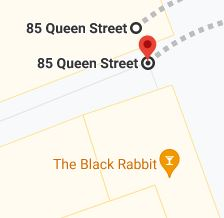 and The Comic's Lounge location ID 70 


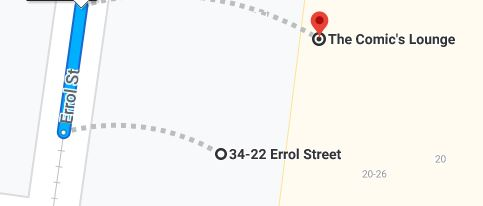

## Images of the club vs the sensor

## Now let's graph the first Club/ Music venue The Black Rabbit location ID 36

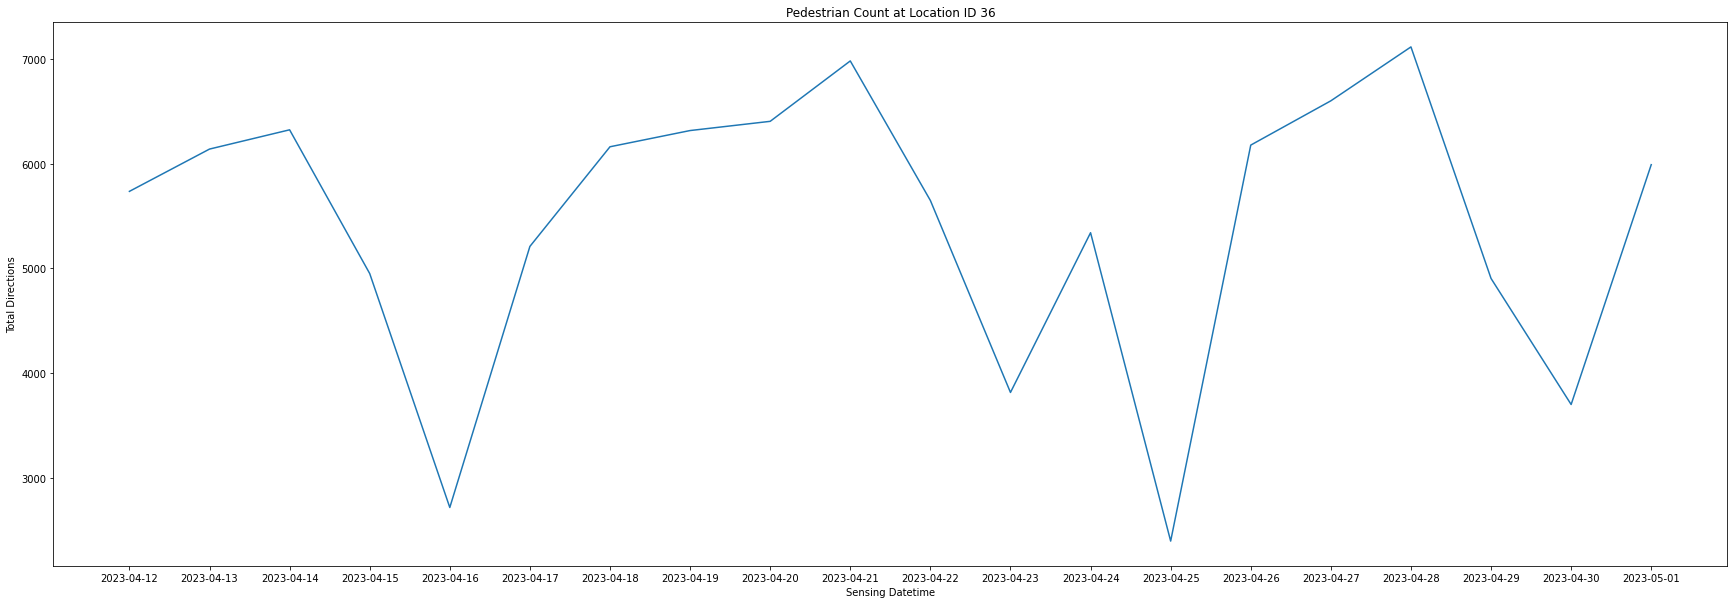

In [45]:
import requests
import matplotlib.pyplot as plt

sensingdates = [ '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30', '2023-05-01']

responses = []
data1 = []

for sensingdate in sensingdates:
    response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=9999&sort=timestamp&facet=timestamp&facet=locationid&refine.timestamp={sensingdate}&refine.locationid=36&timezone=Australia%2Fsydney')
    responses.append(response)
    data = response.json()
    data1.append(data)


total_directions_list = []
day_total = 0
i = 0
while i < len(sensingdates):
    for record in data1[i]['records']:
        total_directions = record['fields']['total_of_directions']
        day_total += total_directions
    total_directions_list.append(day_total)
    day_total = 0
    i += 1 
    
fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensingdates, total_directions_list)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 36')
plt.show()

## As shown by the graph, there are spikes on Saturdays and Fridays which are when the club would be at its most popular  

## Now let's graph the peak of the graph which is 22/4/23 Saturday to see if it is the club increases the foot traffic 

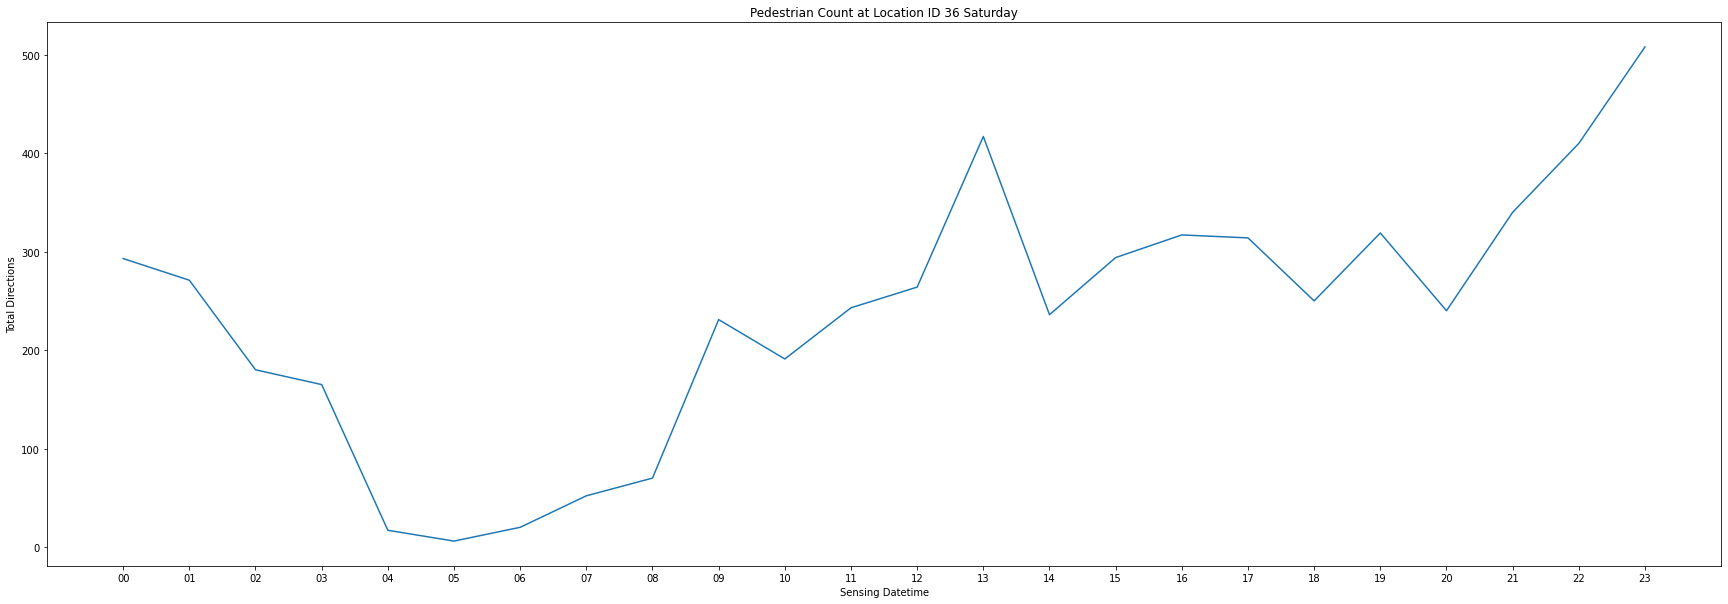

In [51]:
import requests
import matplotlib.pyplot as plt

sensing_datetime1 = []
total_directions1 = []

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=10000&sort=-timestamp&facet=timestamp&facet=locationid&refine.timestamp=2023-04-22&refine.locationid=36&timezone=Australia%2Fsydney')
data = response.json()

for record in data['records']:
    sensing_datetime = record['fields']['timestamp']
    sensing_datetime1.append(sensing_datetime[11:13])
    total_directions = record['fields']['total_of_directions']
    total_directions1.append(total_directions)

fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensing_datetime1, total_directions1)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 36 Saturday')
plt.show()

## In the graph, you can see at the start in the AMs people leaving the club from Friday and as the end people heading to the club that night

## Now let's check the graph the day after the Sunday to see if the clubgoers head home in the AMs

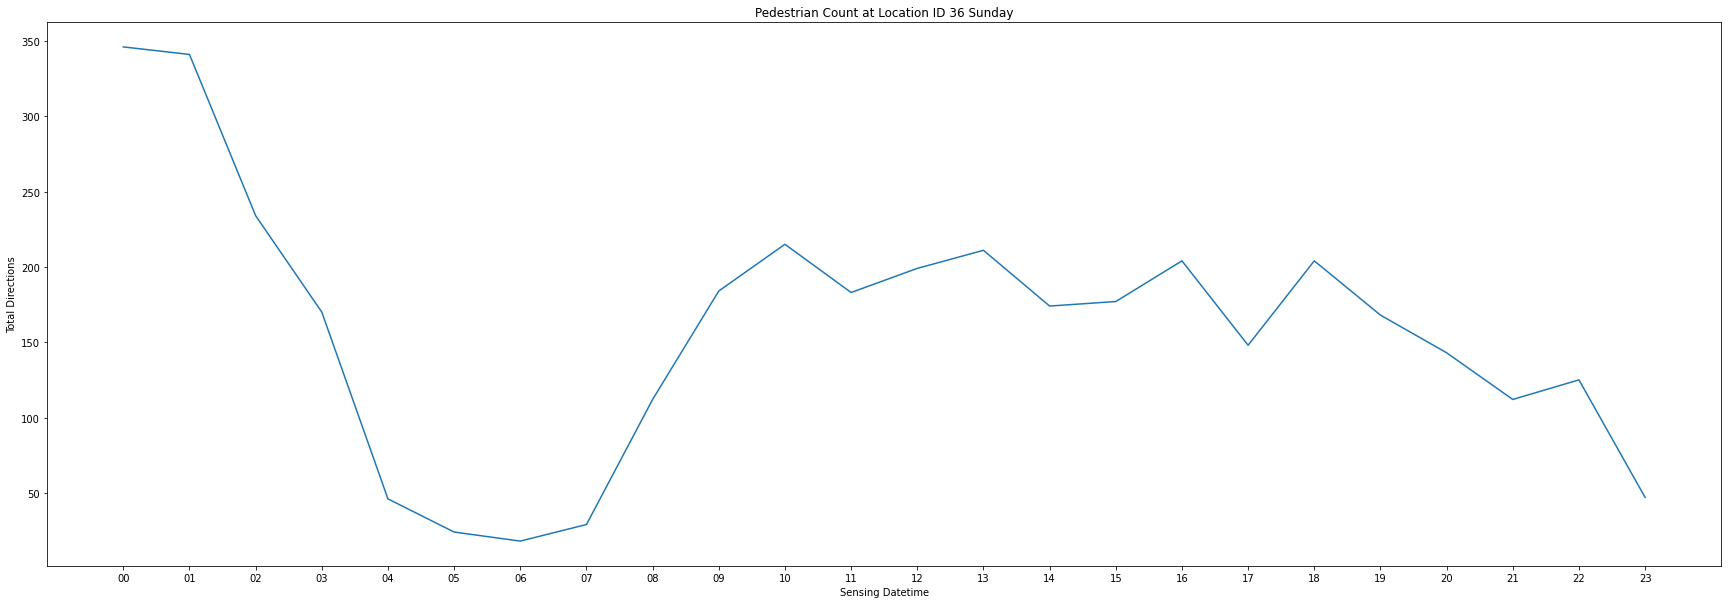

In [44]:
import requests
import matplotlib.pyplot as plt

sensing_datetime1 = []
total_directions1 = []

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=4000&sort=-timestamp&facet=timestamp&facet=locationid&refine.locationid=36&refine.timestamp=2023-04-23&timezone=Australia%2Fsydney')
data = response.json()

for record in data['records']:
    sensing_datetime = record['fields']['timestamp']
    sensing_datetime1.append(sensing_datetime[11:13])
    total_directions = record['fields']['total_of_directions']
    total_directions1.append(total_directions)
 
fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensing_datetime1, total_directions1)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 36 Sunday')
plt.show()

## As you can see these graph shows a large spike overnight meaning it was the club that improved the foot traffic and you also see them heading home in the morning.

## This means if you own a food business nearby it would be a good idea to stay open over the night as the most foot traffic in this area is 11 pm 12 am and 1 am. It would also be a good idea to put a sign advertising your business near the club.

## This graph shows a sensor near The Comic's Lounge which has live events on Fridays and Saturdays

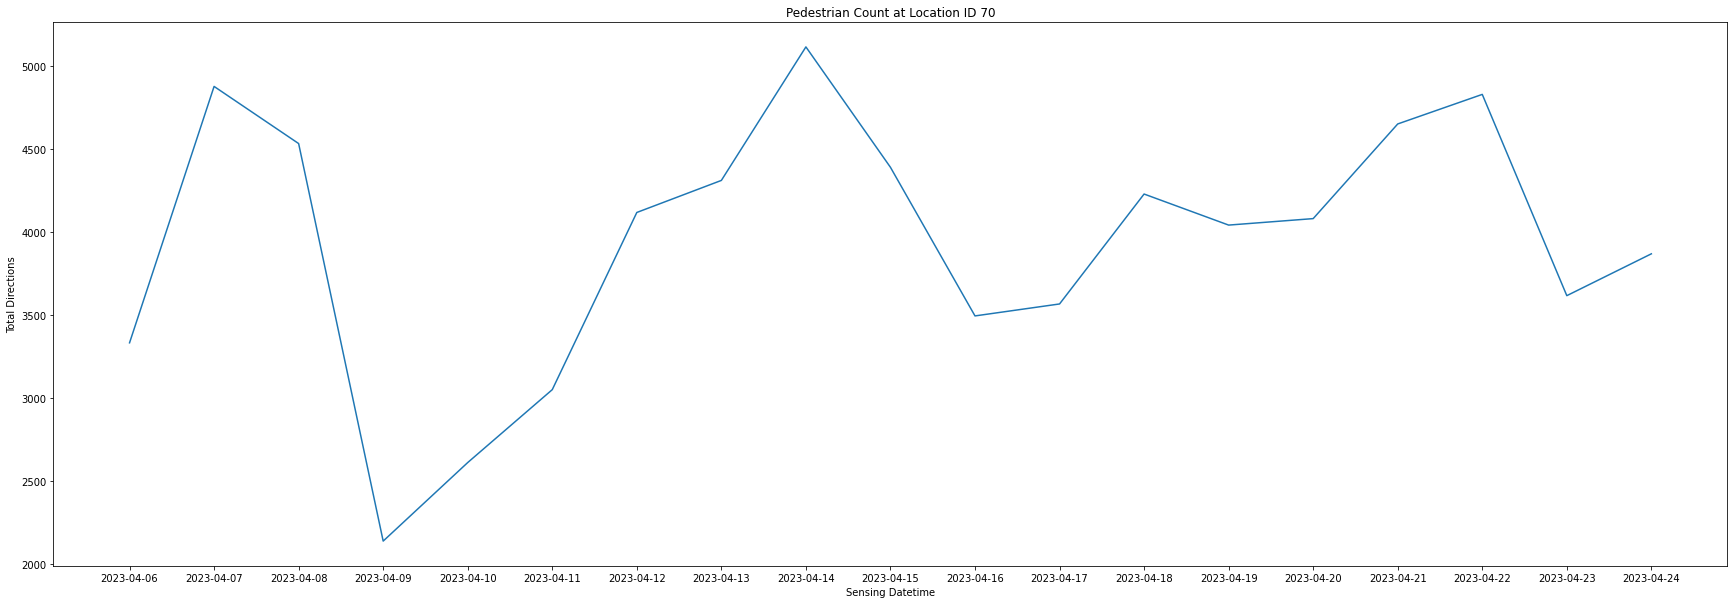

In [17]:
import requests
import matplotlib.pyplot as plt

sensingdates = ['2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24']
responses = []
data1 = []

for sensingdate in sensingdates:
    response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=9999&sort=timestamp&facet=timestamp&facet=locationid&refine.timestamp={sensingdate}&refine.locationid=70&timezone=Australia%2Fsydney')
    responses.append(response)
    data = response.json()
    data1.append(data)


total_directions_list = []
day_total = 0
i = 0
while i < len(sensingdates):
    for record in data1[i]['records']:
        total_directions = record['fields']['total_of_directions']
        day_total += total_directions
    total_directions_list.append(day_total)
    day_total = 0
    i += 1 
    
fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensingdates, total_directions_list)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 70')
plt.show()

## This graph does show a large increase on Fridays and Saturdays.

## Now let's graph the event on 14/4/23 which brought a lot of foot traffic


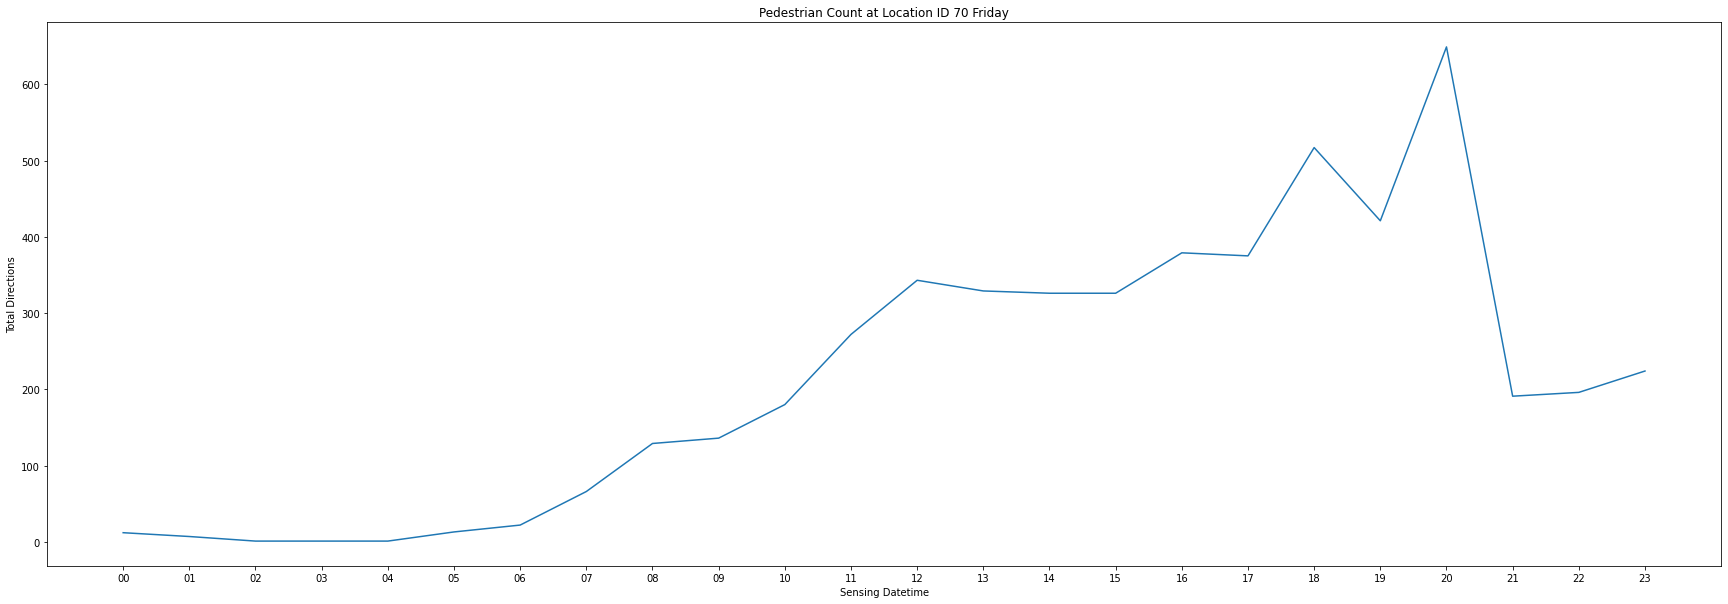

In [1]:
import requests
import matplotlib.pyplot as plt

sensing_datetime1 = []
total_directions1 = []

response = requests.get(f'https://data.melbourne.vic.gov.au/api/records/1.0/search/?dataset=pedestrian-counting-system-monthly-counts-per-hour&q=&rows=9999&sort=-timestamp&facet=timestamp&facet=locationid&refine.timestamp=2023-04-14&refine.locationid=70&timezone=Australia%2Fsydney')
data = response.json()

for record in data['records']:
    sensing_datetime = record['fields']['timestamp']
    sensing_datetime1.append(sensing_datetime[11:13])
    total_directions = record['fields']['total_of_directions']
    total_directions1.append(total_directions)

fig, ax = plt.subplots(figsize=(30, 10)) 
ax.plot(sensing_datetime1, total_directions1)
ax.set_xlabel('Sensing Datetime')
ax.set_ylabel('Total Directions')
ax.set_title('Pedestrian Count at Location ID 70 Friday')
plt.show()

## The reason for this large increase in foot traffic is due to the fact that night there was a comedy festival showing at the club which is what resulted in the extra foot traffic before 9 pm  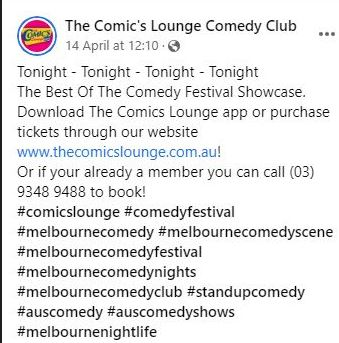

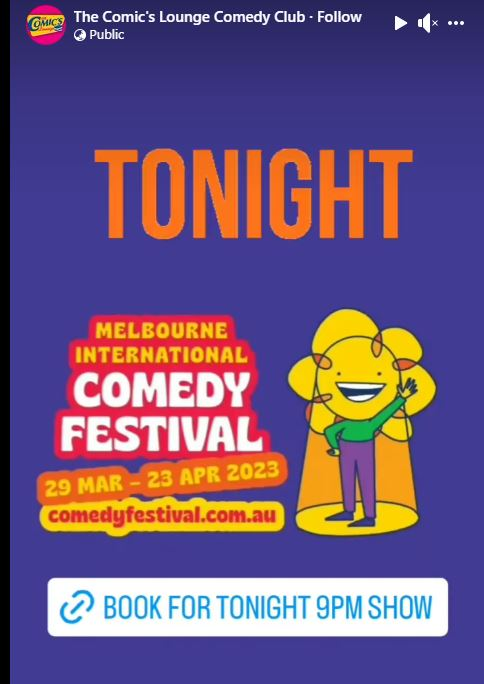

## In conclusion, live events, such as football games, Clubs with live music, concerts and comics clubs have a significant impact on foot traffic patterns. These graphs clearly demonstrate that during the hours leading up to and following the events, there is a notable increase in the number of people in the areas. This influx of individuals presents a valuable opportunity for local businesses to capitalize on the heightened foot traffic and potentially boost their sales.

## By staying open later on event nights and tailoring their marketing efforts to target the increased audience, businesses can maximize their exposure and attract more customers. Additionally, the presence of portable businesses or food trucks in close proximity to the event venue can cater to the needs and preferences of the crowd, further enhancing the overall experience.

## Understanding and leveraging the relationship between live events and increased foot traffic can provide businesses with a competitive advantage. By strategically aligning their operations, promotions, and offerings with these events, local businesses can create a positive impact on their bottom line while also enriching the overall event experience for attendees.

## Ultimately, recognizing the potential of live events to bring more people at specific times presents a promising avenue for local businesses to thrive and establish themselves as integral parts of the event ecosystem.
